In [1]:
#make 4 grid depicting column density with curve fit function
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize

In [2]:
#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz', '/scratch/jak491/npz_storage/covering_grid_den_high.npz')
percent = 5
perc = '5'
#titles = ('gravity only', 'gravity + turbulence','gravity + turbulence\n + magnetic fields', 'gravity + turbulence\n + magnetic fields + protostellar outflows')
titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )
lower_limit = .5
upper_limit = 2

In [3]:
#define function
def linear(x, m, b): 
    return m*x + b
    
#y2 = linear(range(6),np.ones(6)*2,np.ones(6))

In [4]:
#plot setup
d = {}
variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
input_file = inputfile[percent]
plot_data = np.load(input_file, allow_pickle=True)

In [ ]:
#main processing cell. 
start = time.time()
print('starting')
slopes = []
error = []
fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True,figsize=(12,8))
ax =ax.ravel()
plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
b = 0

for n in range(4):
    den = plot_data[plot_data.files[n]]
    color_list = ('b', 'r', 'g')
    print(n)     #for time keeping
    
    for a in (range(3)):

        log_den_d = plot_data[plot_data.files[4+b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)
        #create subrange and plots linear fit
        x =[]
        y = []
        for i in range(len(bin_list)):
            if bin_list[i] > lower_limit:
                if counts_d[i] > 0:
                        x.append(bin_list[i])
                        y.append(counts_d[i])
                else:
                    break
        lin_param, lin_con = scipy.optimize.curve_fit(linear, x, np.log(y))
        y = linear(np.array(x),lin_param[0],lin_param[1])
        
        
        slopes.append(lin_param[0])
        error.append(np.sqrt(np.diag(lin_con))[0])
        ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .5)
        ax[n].plot(x,np.exp(y), color = color_list[a])
        
    if n > 1:
        ax[n].set_xlabel(r'ln($N/N_0$)', size=15)
    if n == 0 or n == 2:
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)
    ax[n].set_title(titles[n], size = 17)
    ax[n].set_yscale('log')
    ax[n].legend([ 'x','x fit', 'y', 'y fit', 'z', 'z fit'])
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.savefig('column_den_4lv_'+perc+'%', bbox_inches='tight')
plt.show()

#write slope to txt file for later
file = open("slope_" +perc+"%.txt", "w")
str_dictionary = repr(slopes)
file.write(str_dictionary + "\n")
str_dictionary = repr(error)
file.write(str_dictionary + "\n")
file.close()

end = time.time()
print("time:",(end-start)/60)

starting
0


In [30]:
np.sqrt(np.diag(lin_con))[0]

0.11850872427931224

In [85]:
#create subrange between bin values of limits set near top
'''x =[]
y = []
for i in range(len(bin_list)):
    if bin_list[i] > lower_limit:
        if bin_list[i] < upper_limit:
            x.append(bin_list[i])
            y.append(counts_d[i])
lin_param, lin_con = scipy.optimize.curve_fit(linear,x,np.exp(y)) #np.exp(y))
m = np.ones(len(x))*lin_param[0]
b = np.ones(len(x))*lin_param[1]
print(y)
y = linear(x,m,b)
print(y)
'''

[0.12028206390182117, 0.07764872273452289, 0.05176342633239122, 0.03539520457644749, 0.022545720509719338, 0.011896343307734933, 0.0088075939308471, 0.006055668731949429, 0.001942113877347095, 0.0008098113215506284, 0.0006378159966195256, 0.0002938253467573076, 0.00025082651552453257, 0.00015049590931471855, 0.00016482885305897855, 8.599766246555345e-05]
[1.06732169 1.06127664 1.05523159 1.04918655 1.0431415  1.03709646
 1.03105141 1.02500636 1.01896132 1.01291627 1.00687123 1.00082618
 0.99478114 0.98873609 0.98269104 0.976646  ]
[2.90758164 2.8900582  2.87264036 2.8553275  2.83811898 2.82101417
 2.80401245 2.7871132  2.77031579 2.75361962 2.73702408 2.72052855
 2.70413244 2.68783514 2.67163607 2.65553462]


starting
starting
0
1
2
3


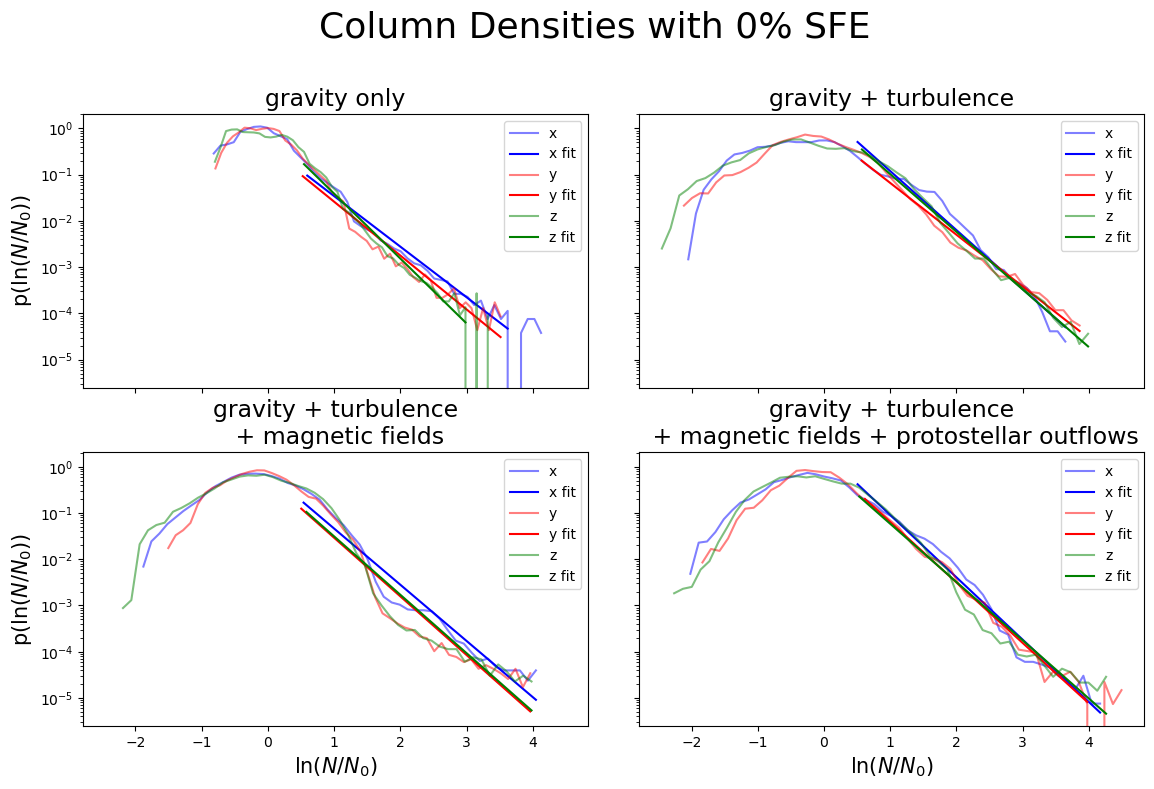

starting
0
1
2
3


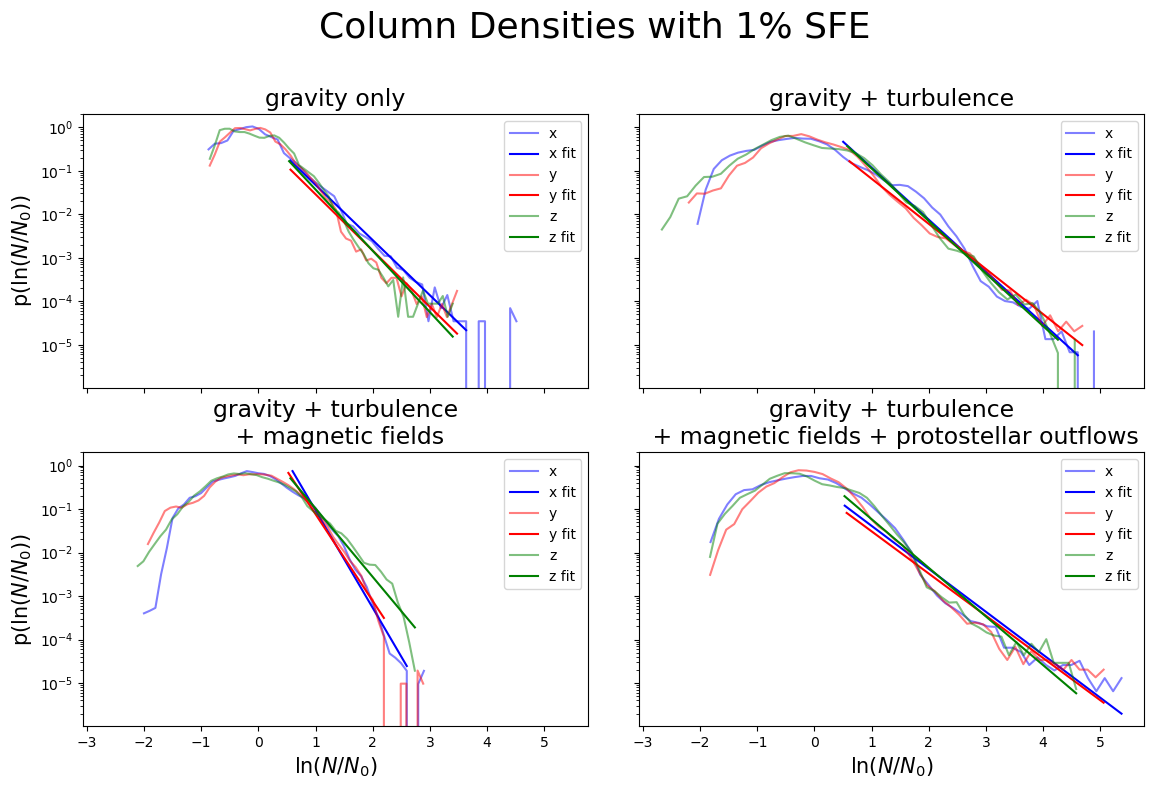

starting
0
1
2
3


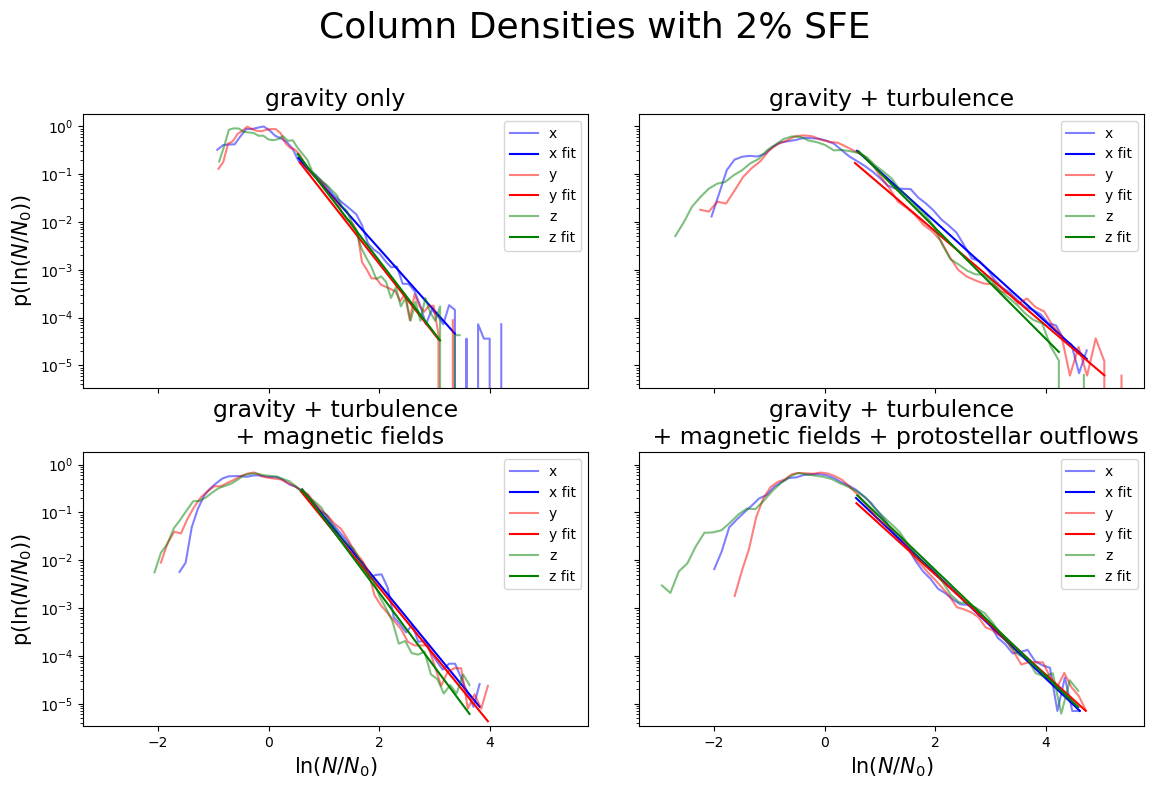

starting
0
1
2
3


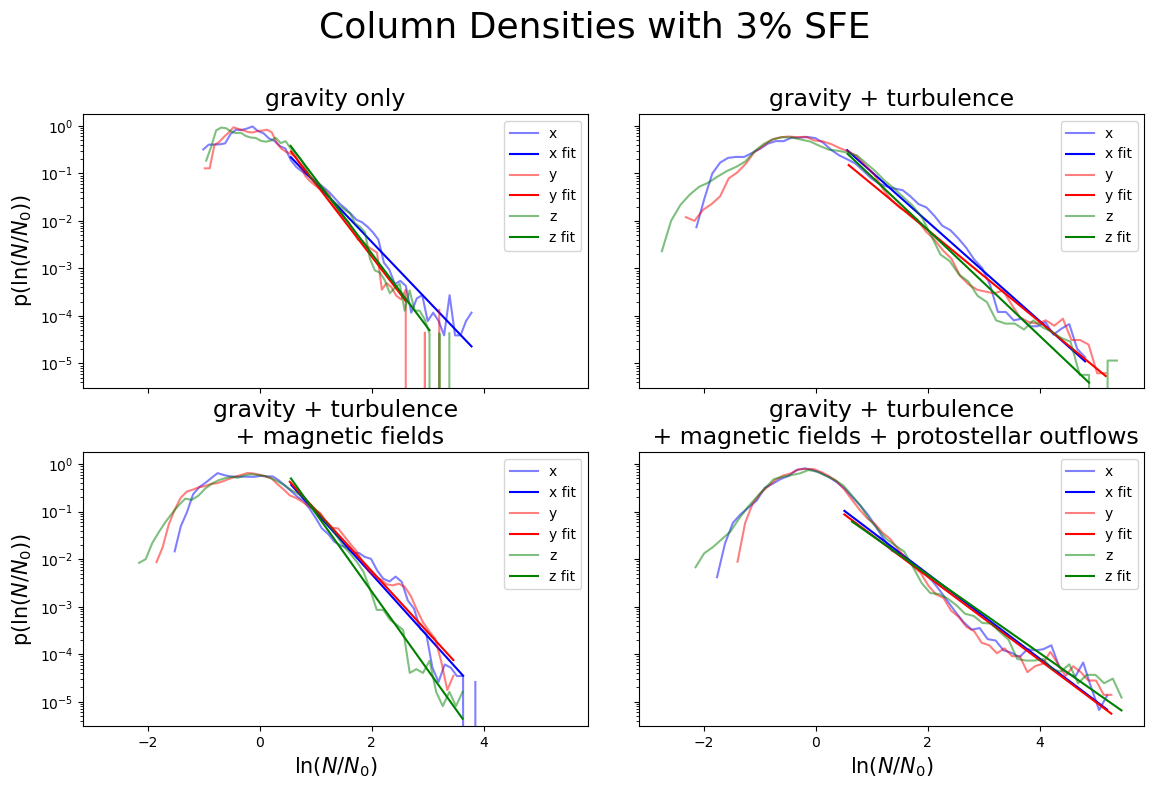

starting
0
1
2
3


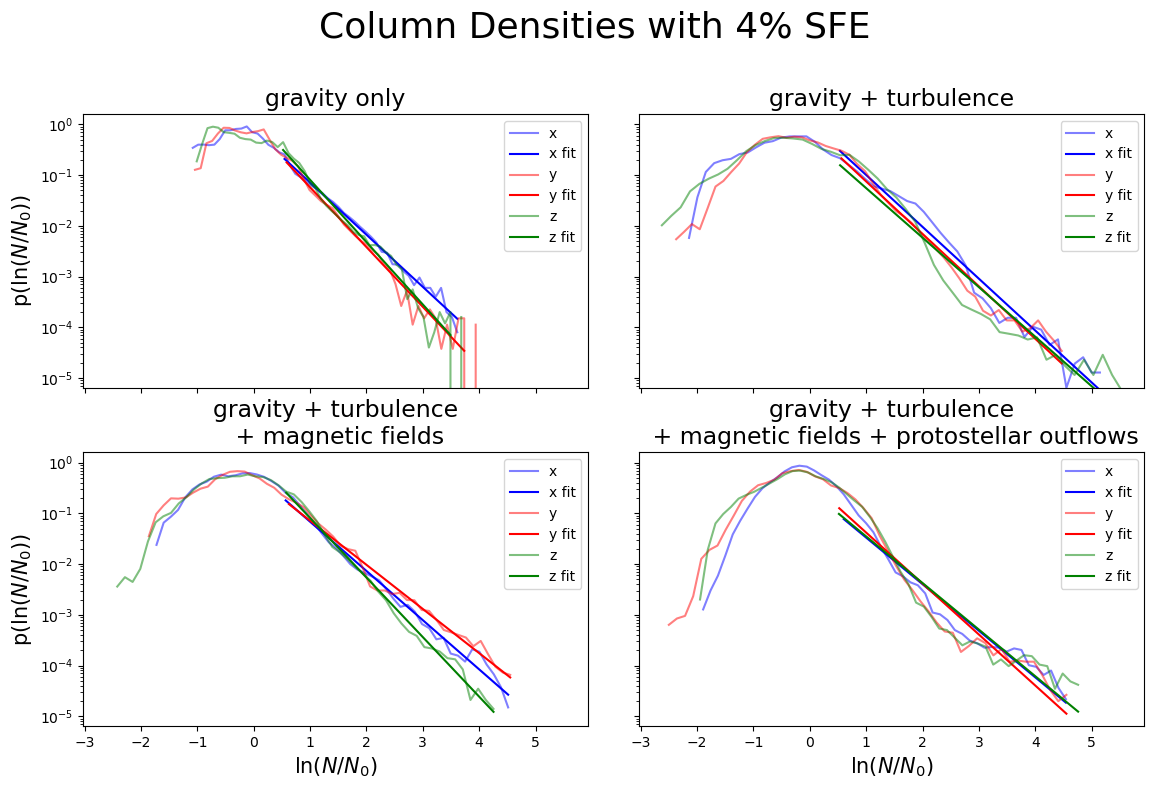

starting
0
1
2
3


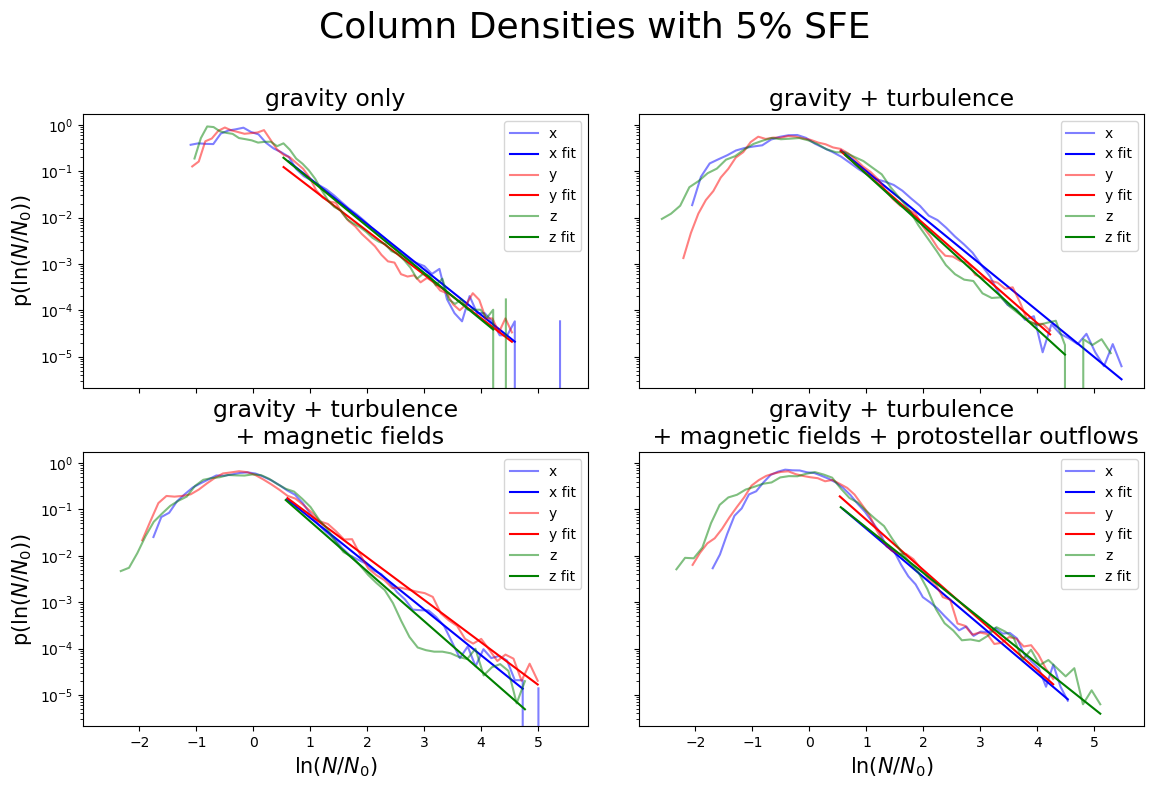

time: 1.0400362412134807


In [38]:
#super cell to generate everything at once, when confident in code
start = time.time()
print('starting')
#define function


def linear(x, m, b): 
    return m*x + b

inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz', '/scratch/jak491/npz_storage/covering_grid_den_high.npz')
perc_int = ('0','1','2','3','4','5')
titles = ('gravity only', 'gravity + turbulence','gravity + turbulence\n + magnetic fields', 'gravity + turbulence\n + magnetic fields + protostellar outflows')
#titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )
lower_limit = .5
for w in range(6):
    percent = w
    perc = perc_int[w]
    d = {}
    variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
    input_file = inputfile[percent]
    plot_data = np.load(input_file, allow_pickle=True)

    #main processing cell. 
    start = time.time()
    print('starting')
    slopes = []
    error = []
    fig, ax = plt.subplots(nrows=2,ncols=2, sharex=True, sharey=True,figsize=(12,8))
    ax =ax.ravel()
    plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
    b = 0

    for n in range(4):
        den = plot_data[plot_data.files[n]]
        color_list = ('b', 'r', 'g')
        print(n)     #for time keeping

        for a in (range(3)):

            log_den_d = plot_data[plot_data.files[4+b]]
            counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
            b = b+1

            bin_list = []
            for i in range(len(binS_d)-1):
                bin_i=(binS_d[i]+binS_d[i+1])/2
                bin_list.append(bin_i)
            #create subrange and plots linear fit
            x =[]
            y = []
            for i in range(len(bin_list)):
                if bin_list[i] > lower_limit:
                    if counts_d[i] > 0:
                            x.append(bin_list[i])
                            y.append(counts_d[i])
                    else:
                        break
            lin_param, lin_con = scipy.optimize.curve_fit(linear, x, np.log(y))
            y = linear(np.array(x),lin_param[0],lin_param[1])


            slopes.append(lin_param[0])
            error.append(np.sqrt(np.diag(lin_con))[0])
            ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .5)
            ax[n].plot(x,np.exp(y), color = color_list[a])

        if n > 1:
            ax[n].set_xlabel(r'ln($N/N_0$)', size=15)
        if n == 0 or n == 2:
            ax[n].set_ylabel(r'p(ln($N/N_0$))', size=15)
        ax[n].set_title(titles[n], size = 17)
        ax[n].set_yscale('log')
        ax[n].legend([ 'x','x fit', 'y', 'y fit', 'z', 'z fit'])
    plt.tight_layout()
    plt.subplots_adjust(top=.85)
    plt.savefig('column_den_4lv_'+perc+'%', bbox_inches='tight')
    plt.show()

    #write slope to txt file for later
    file = open("slope_" +perc+"%.txt", "w")
    str_dictionary = repr(slopes)
    file.write(str_dictionary + "\n")
    str_dictionary = repr(error)
    file.write(str_dictionary + "\n")
    file.close()



end = time.time()
print("time:",(end-start)/60)

In [39]:
error

[0.059166977830628166,
 0.07104519545509026,
 0.06256810576148579,
 0.07272427903414087,
 0.05133822183975681,
 0.10181703494389154,
 0.058038357499772125,
 0.0454852893773306,
 0.11675534984784963,
 0.11173838428825512,
 0.09755892989654887,
 0.11850872427931224]